In [350]:
import pandas as pd 
import re 
import matplotlib.pyplot as plt
import numpy as np
import timeit
import ast

from collections import Counter 
%matplotlib inline


# Chapter 1: Preprocessing & Data Overview 

In [2]:
#p_: professional 
#i_:indicates interest 
#bf_: Big Five test (common human traits); ranges from 1 ~ 5 

df = pd.read_csv("/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_questions_all_190.csv")
df.columns #205 - 1 = 204 problems

Index(['prolific_id', 'p_i5', 'p_a5', 'p_a6', 'p_r7', 'p_a2', 'p_c7', 'p_i3',
       'p_i4', 'p_c4',
       ...
       'bf_33', 'bf_34', 'bf_35', 'bf_36', 'bf_37', 'bf_38', 'bf_39', 'bf_40',
       'bf_-1', 'bf_-2'],
      dtype='object', length=205)

In [3]:
df.head()

,prolific_id,p_i5,p_a5,p_a6,p_r7,p_a2,p_c7,p_i3,p_i4,p_c4,...,bf_33,bf_34,bf_35,bf_36,bf_37,bf_38,bf_39,bf_40,bf_-1,bf_-2
0,5bd6f3369c5d1f000195e70c,0,1,1,0,1,0,0,0,0,...,3,3,5,3,3,1,5,4,4,5
1,5badf0aeae1d020001df2cc7,0,1,1,1,1,0,1,1,1,...,4,3,4,4,3,1,4,4,1,3
2,5e3df34cfb9ed506f1028bb5,0,0,0,0,0,0,0,0,0,...,3,1,4,5,3,3,4,4,1,3
3,5baf6705848bbd0001d6fc8a,0,1,1,0,1,0,1,1,0,...,2,3,3,3,5,2,4,4,2,5
4,5a4cc59d30adf700015cc9c0,0,0,0,0,1,0,1,1,0,...,4,5,5,2,4,3,4,4,2,4


For each topic, we aggregated questions that are either positive or negative (i.e. Tidy/Untidy)

In [421]:
with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/5bd6f3369c5d1f000195e70c.json', encoding='utf-8-sig') as f_input:
    df1 = pd.read_json(f_input)

df1.head()   

,prolific_id,mouse_track
page1,5bd6f3369c5d1f000195e70c,"{'frames': [['s', 0, 0], ['s', 0, 231, 0.00499..."
page10,5bd6f3369c5d1f000195e70c,"{'frames': [['s', 0, 1308], ['s', 0, 1306, 0.0..."
page11,5bd6f3369c5d1f000195e70c,"{'frames': [['s', 0, 1308], ['s', 0, 1300, 0.0..."
page12,5bd6f3369c5d1f000195e70c,"{'frames': [['s', 0, 1308], ['s', 0, 1300, 0.0..."
page13,5bd6f3369c5d1f000195e70c,"{'frames': [['s', 0, 1308], ['s', 0, 1306, 0.0..."


# Chapter 2: Finding the Flag (Suspicious users)

# 1. Validation Questions for common human traits (bf_):

We mark the answer deviates more than 1 in bf_ type questions (40/42) as one warning flag <br/>
'validation_1':  should be same as bf_1  i.e:  untidy -- (1,-1)  <br/>
'validation_2':  should be same as bf_21  i.e:  emotional -- (21,-2) 

In [8]:
# the answer data from mouse_questions_all_190
df.head()

,prolific_id,p_i5,p_a5,p_a6,p_r7,p_a2,p_c7,p_i3,p_i4,p_c4,...,bf_33,bf_34,bf_35,bf_36,bf_37,bf_38,bf_39,bf_40,bf_-1,bf_-2
0,5bd6f3369c5d1f000195e70c,0,1,1,0,1,0,0,0,0,...,3,3,5,3,3,1,5,4,4,5
1,5badf0aeae1d020001df2cc7,0,1,1,1,1,0,1,1,1,...,4,3,4,4,3,1,4,4,1,3
2,5e3df34cfb9ed506f1028bb5,0,0,0,0,0,0,0,0,0,...,3,1,4,5,3,3,4,4,1,3
3,5baf6705848bbd0001d6fc8a,0,1,1,0,1,0,1,1,0,...,2,3,3,3,5,2,4,4,2,5
4,5a4cc59d30adf700015cc9c0,0,0,0,0,1,0,1,1,0,...,4,5,5,2,4,3,4,4,2,4


In [9]:
def find_str(f,s):

    col = list(f.columns)
    output_str = ['prolific_id']
    
    for item in col:
        if re.search('^'+s,item):
            output_str.append(item)
    
    return output_str


In [10]:
bf_col = find_str(df,'bf')
df_bf = df[bf_col]
df_bf.head()


,prolific_id,bf_1,bf_2,bf_3,bf_4,bf_5,bf_6,bf_7,bf_8,bf_9,...,bf_33,bf_34,bf_35,bf_36,bf_37,bf_38,bf_39,bf_40,bf_-1,bf_-2
0,5bd6f3369c5d1f000195e70c,4,4,3,1,2,1,2,5,5,...,3,3,5,3,3,1,5,4,4,5
1,5badf0aeae1d020001df2cc7,1,4,4,1,3,2,1,4,1,...,4,3,4,4,3,1,4,4,1,3
2,5e3df34cfb9ed506f1028bb5,1,5,5,1,2,1,1,1,1,...,3,1,4,5,3,3,4,4,1,3
3,5baf6705848bbd0001d6fc8a,2,1,4,1,4,2,1,2,2,...,2,3,3,3,5,2,4,4,2,5
4,5a4cc59d30adf700015cc9c0,4,3,3,2,2,1,4,1,3,...,4,5,5,2,4,3,4,4,2,4


In [409]:
#(df_bf.bf_1 - df_bf['bf_-1']).value_counts()
#(df_bf.bf_21 - df_bf['bf_-2']).value_counts()

In [13]:
# The flag list is used to collect all the "suspious" survey taker in different validation methods
flag_list = [] 

validation_1 = df_bf[abs(df_bf.bf_1 - df_bf['bf_-1']) > 1].prolific_id
validation_2 = df_bf[abs(df_bf.bf_21 - df_bf['bf_-2']) > 1].prolific_id
flag_list = flag_list + list(validation_1) + list(validation_2)

Counter(flag_list)


Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 1,
         '5c6dc008b027110001ada68a': 2,
         '5c0d109e73986d0001785b39': 1,
         '5e86366d568c630d55dbfe3b': 1,
         '5c9f84909e01ef001897db75': 2,
         '5dd5211a4ad3e24c93d3c65b': 2,
         '5d4af314cf8a4700010f409d': 1,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1})

# 2. Validation Questions for miq_ questions:

'validation_3':  score should be 2 or 4 <br/>
'validation_4':  score should be 2 or 4 <br/>
eg:‘3.0’: Validation question: “I can avoid communication with other people for months”
Press 4 if you agree, 2 if you disagree <br/>
eg:‘6.0’: Validation question: “I am travelling trans-Atlantic 5 or more times a month”,
Press 4 if you agree, 2 if you disagree 



In [14]:
df_miq = df[find_str(df,'miq')]
df_miq.head()


,prolific_id,miq_7.8,miq_7.4,miq_7.3,miq_2.8,miq_3.0,miq_5.2,miq_1.7,miq_2.3,miq_7.5,...,miq_4.6,miq_7.7,miq_3.7,miq_8.7,miq_4.5,miq_3.1,miq_7.2,miq_4.1,miq_5.6,miq_1.8
0,5bd6f3369c5d1f000195e70c,5,3,1,3,2,5,1,4,5,...,5,5,3,5,5,5,5,5,3,5
1,5badf0aeae1d020001df2cc7,4,5,4,4,2,5,2,3,5,...,5,3,4,5,3,3,4,4,1,3
2,5e3df34cfb9ed506f1028bb5,5,5,5,5,4,5,1,3,4,...,5,4,4,5,4,4,4,3,3,4
3,5baf6705848bbd0001d6fc8a,5,5,5,4,2,5,5,4,4,...,5,4,5,5,4,4,4,5,3,4
4,5a4cc59d30adf700015cc9c0,3,4,3,3,4,3,1,5,4,...,5,2,2,5,4,3,2,4,1,5


In [15]:
validation_3 = df_miq[(df_miq['miq_3.0'] != 2) & (df_miq['miq_3.0'] != 4)].prolific_id
validation_4 = df_miq[(df_miq['miq_6.0'] != 2) & (df_miq['miq_6.0'] != 4)].prolific_id

flag_list = flag_list + list(validation_3) + list(validation_4)
Counter(flag_list)


Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 2,
         '5c6dc008b027110001ada68a': 4,
         '5c0d109e73986d0001785b39': 1,
         '5e86366d568c630d55dbfe3b': 2,
         '5c9f84909e01ef001897db75': 2,
         '5dd5211a4ad3e24c93d3c65b': 2,
         '5d4af314cf8a4700010f409d': 1,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1,
         '5e8efc69dc9b18027705fc4b': 2,
         '5be0662a96c08200013b8fc2': 2,
         '5dcc61ad900e3e8fe2aa68aa': 2,
         '5e7e0473fc5712039e96e6a2': 1,
         '5adfa601eb6040000153a828': 2,
         '5e728edbc33987088002eed4': 1,
         '5e475a68a95b8c226a442bfb': 2,
         '5d3a10f0708b4f0001aa2513': 2,
         '5e3ff59bf2160b23942ada93': 1,
         '5d40706844220d00191363da': 1,
         '5e1dcb521a938a1356cc585e': 1,
         '5e81acd02c3f6989a2f0a8e0': 1,
         '5e2712e1f1fa1b9422ea194a': 1})

# 3. Advanced Word Validation
['Unenvious', 'Envious']
[ 'Efficient', 'Inefficient']
['Unkind', 'Kind']
['Artistic', 'Philosophical']
['Untalkative', 'Talkative']
['Reserved', 'Outgoing']
['Anxious', 'Unanxious']
['Warm', 'Harsh']
['Sympathetic', 'Harsh']
['Uncreative', 'Creative']
['Organized', 'Disorganized']
['Shy', 'Extraverted']
['Jealous', 'Unenvious']
['Anxious', 'Unworried']
['Neat', 'Disorganized']
['Creative', 'Unimaginative']
['Systematic', 'Disorganized']



In [16]:
words = [['Unenvious', 'Envious'],[ 'Efficient', 'Inefficient'], ['Unkind', 'Kind'],['Untalkative', 'Talkative'], ['Reserved', 'Outgoing'], ['Anxious', 'Unanxious'], ['Warm', 'Harsh'],['Sympathetic', 'Harsh'], ['Uncreative', 'Creative'],['Organized', 'Disorganized'], ['Shy', 'Extraverted'], ['Jealous', 'Unenvious'],['Anxious', 'Unworried'],['Neat', 'Disorganized'],['Creative', 'Unimaginative'],['Systematic', 'Disorganized']]

words_dic = {'1': 'Untidy','2': 'Unenvious','3': 'Efficient','4': 'Unkind','5': 'Artistic','6': 'Untalkative','7': 'Rude','8': 'Reserved','9': 'Anxious',
'10': 'Warm','11': 'Moody','12': 'Envious','13': 'Uncreative','14': 'Intelligent','15': 'Deep','16': 'Cooperative','17': 'Jealous','18': 'Neat','19': 'Shy',
'20': 'Extraverted','21': 'Emotional','22': 'Unworried','23': 'Quiet','24': 'Unanxious','25': 'Organized','26': 'Inefficient','27': 'Careless',
'28': 'Harsh','29': 'Energetic','30': 'Creative','31': 'Disorganized','32': 'Inconsiderate','33': 'Philosophical','34': 'Outgoing','35': 'Kind',
'36': 'Systematic','37': 'Talkative','38': 'Unimaginative','39': 'Sympathetic','40': 'Intellectual'}
inv_word = {v: k for k, v in words_dic.items()}

In [17]:
def find_word_anomalies(df_bf1):
    
    s = []
    for i in range(len(words)):
        w1 = words[i][0]
        w2 = words[i][1] 

        df_bf1[w1] = df_bf1['bf_'+inv_word[w1]] + df_bf1['bf_'+inv_word[w2]]
        l_morethan8 = list(df_bf1['prolific_id'].loc[df_bf1[w1]>8])
        l_lessthan4 = list(df_bf1['prolific_id'].loc[df_bf1[w1]<4])

        s = s + l_morethan8 + l_lessthan4
    
    return [name for name, count in Counter(s).items() if count >= 3]


In [18]:
flag_list = flag_list + find_word_anomalies(df_bf)
Counter(flag_list)


/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 2,
         '5c6dc008b027110001ada68a': 4,
         '5c0d109e73986d0001785b39': 2,
         '5e86366d568c630d55dbfe3b': 3,
         '5c9f84909e01ef001897db75': 3,
         '5dd5211a4ad3e24c93d3c65b': 2,
         '5d4af314cf8a4700010f409d': 1,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1,
         '5e8efc69dc9b18027705fc4b': 2,
         '5be0662a96c08200013b8fc2': 2,
         '5dcc61ad900e3e8fe2aa68aa': 3,
         '5e7e0473fc5712039e96e6a2': 1,
         '5adfa601eb6040000153a828': 2,
         '5e728edbc33987088002eed4': 1,
         '5e475a68a95b8c226a442bfb': 2,
         '5d3a10f0708b4f0001aa2513': 2,
         '5e3ff59bf2160b23942ada93': 1,
         '5d40706844220d00191363da': 1,
         '5e1dcb521a938a1356cc585e': 1,
         '5e81acd02c3f6989a2f0a8e0': 1,
         '5e2712e1f1fa1b9422ea194a': 1,


# 4. Validation for Survey taking time 

Explaination: The benchmark read time of a regular user was derived from Medium’s read-time algorithm, which is based on the average reading speed of an adult ( 256 wpm). The read time was calculated for all the individual questions in our users’ surveys and compared to the time it took them to click one radio button to another (an indication of them moving from one question to the other). From our analysis, on average, a user that completed the entire survey would need 5 minutes and 30 seconds to at least read all the 196 questions

In [19]:
'''
len(df_votes.user_id.unique()) #755
df_votes[df_votes.user_id == 365]

diff_maxt = df_votes.groupby('user_id').apply(lambda df_votes,x:max(df_votes[x]),'updated_at')
diff_mint = df_votes.groupby('user_id').apply(lambda df_votes,x:min(df_votes[x]),'created_at')

'''

"\nlen(df_votes.user_id.unique()) #755\ndf_votes[df_votes.user_id == 365]\n\ndiff_maxt = df_votes.groupby('user_id').apply(lambda df_votes,x:max(df_votes[x]),'updated_at')\ndiff_mint = df_votes.groupby('user_id').apply(lambda df_votes,x:min(df_votes[x]),'created_at')\n\n"

In [20]:
with open('/Users/guapofish/Desktop/mouse_track_data_190_users/clicktimer_190.json', encoding='utf-8-sig') as f_input:
    df_clicktimer = pd.read_json(f_input)
    
# clicktimer_190.json contains time of mouse clicks and identifiers of elements selected.
user_id = list(df_clicktimer.columns)
df_clicktimer

,5bd6f3369c5d1f000195e70c,5a4cc59d30adf700015cc9c0,5baf6705848bbd0001d6fc8a,5badf0aeae1d020001df2cc7,5e3df34cfb9ed506f1028bb5,5e980cf3b3aaca000b89841e,5e84b06e7e76840445362846,5b81d72a3c13750001995473,5adcd1c8dee8590001b026a8,5e0ef113805a30621e0e3c01,...,5c44b3fe1bbffd0001014286,5e8db02f9b5ff0033fb25a8a,5d4602322f66d0001a1208c7,5e5fbff6de7bcc2fc7f396db,5e8518347ad752103913de56,5e838c1605d2ad0c14ed684b,5dbc534dcc227d1f37845307,5c3ce3a6de04ad0001d8a6cc,5d2b45b9f7ef930001c5fa2d,5e19b97a8a76fb239d3e33d6
29,"{'cx': 374, 'cy': 735, 'clicktime': [158564650...","{'cx': 719, 'cy': 422, 'clicktime': [158564776...","{'cx': 760, 'cy': 1499, 'clicktime': [15856478...","{'cx': 503, 'cy': 742, 'clicktime': [158565346...","{'cx': 632, 'cy': 1672, 'clicktime': [15856590...","{'cx': 340, 'cy': 1351, 'clicktime': [15870315...","{'cx': 420, 'cy': 422, 'clicktime': [158703167...","{'cx': 1068, 'cy': 1668, 'clicktime': [1587033...","{'cx': 952, 'cy': 422, 'clicktime': [158703250...","{'cx': 1020, 'cy': 1355, 'clicktime': [1587036...",...,"{'cx': 983, 'cy': 422, 'clicktime': [159137293...","{'cx': 332, 'cy': 1367, 'clicktime': [15913733...","{'cx': 375, 'cy': 1666, 'clicktime': [15913850...","{'cx': 830, 'cy': 422, 'clicktime': [159162808...","{'cx': 332, 'cy': 1681, 'clicktime': [15916288...","{'cx': 460, 'cy': 1054, 'clicktime': [15916279...","{'cx': 1060, 'cy': 428, 'clicktime': [15916280...","{'cx': 632, 'cy': 1681, 'clicktime': [15916285...","{'cx': 300, 'cy': 4486, 'clicktime': [15916294...","{'cx': 1060, 'cy': 1367, 'clicktime': [1591631..."
92,"{'cx': 975, 'cy': 735, 'clicktime': [158564651...","{'cx': 1020, 'cy': 1360, 'clicktime': [1585648...","{'cx': 1060, 'cy': 1842, 'clicktime': [1585648...","{'cx': 503, 'cy': 1056, 'clicktime': [15856542...","{'cx': 632, 'cy': 1672, 'clicktime': [15856583...","{'cx': 940, 'cy': 731, 'clicktime': [158703162...","{'cx': 420, 'cy': 1667, 'clicktime': [15870319...","{'cx': 1068, 'cy': 1358, 'clicktime': [1587032...","{'cx': 952, 'cy': 1672, 'clicktime': [15870339...","{'cx': 720, 'cy': 1355, 'clicktime': [15870354...",...,"{'cx': 683, 'cy': 1666, 'clicktime': [15913729...","{'cx': 632, 'cy': 1367, 'clicktime': [15913730...","{'cx': 675, 'cy': 1666, 'clicktime': [15913844...","{'cx': 830, 'cy': 1044, 'clicktime': [15916282...","{'cx': 332, 'cy': 1367, 'clicktime': [15916285...","{'cx': 460, 'cy': 428, 'clicktime': [159162852...","{'cx': 460, 'cy': 1054, 'clicktime': [15916304...","{'cx': 632, 'cy': 1681, 'clicktime': [15916283...","{'cx': 300, 'cy': 1152, 'clicktime': [15916302...","{'cx': 1060, 'cy': 1680, 'clicktime': [1591631..."
113,"{'cx': 374, 'cy': 1360, 'clicktime': [15856465...","{'cx': 719, 'cy': 422, 'clicktime': [158564866...","{'cx': 460, 'cy': 1842, 'clicktime': [15856488...","{'cx': 203, 'cy': 1369, 'clicktime': [15856537...","{'cx': 932, 'cy': 735, 'clicktime': [158565799...","{'cx': 640, 'cy': 731, 'clicktime': [158703102...","{'cx': 720, 'cy': 733, 'clicktime': [158703175...","{'cx': 768, 'cy': 1668, 'clicktime': [15870326...","{'cx': 651, 'cy': 1672, 'clicktime': [15870315...","{'cx': 1020, 'cy': 1355, 'clicktime': [1587035...",...,"{'cx': 983, 'cy': 422, 'clicktime': [159137234...","{'cx': 332, 'cy': 1367, 'clicktime': [15913731...","{'cx': 375, 'cy': 1666, 'clicktime': [15913844...","{'cx': 530, 'cy': 1044, 'clicktime': [15916278...","{'cx': 632, 'cy': 1367, 'clicktime': [15916286...","{'cx': 460, 'cy': 741, 'clicktime': [159162849...","{'cx': 460, 'cy': 1680, 'clicktime': [15916278...","{'cx': 332, 'cy': 1054, 'clicktime': [15916284...","{'cx': 300, 'cy': 6390, 'clicktime': [15916307...","{'cx': 1060, 'cy': 741, 'clicktime': [15916320..."
143,"{'cx': 975, 'cy': 1047, 'clicktime': [15856465...","{'cx': 719, 'cy': 1047, 'clicktime': [15856473...","{'cx': 1060, 'cy': 471, 'clicktime': [15856489...","{'cx': 803, 'cy': 428, 'clicktime': [158565452...","{'cx': 632, 'cy': 1360, 'clicktime': [15856589...","{'cx': 340, 'cy': 731, 'clicktime': [158703134...","{'cx': 1020, 'cy': 422, 'clicktime':

In [21]:
def user_time_count(user_id):   
        
    l = []
    new = df_clicktimer[user_id].dropna()
        
    for i in range(len(new)):
        l.append(new.iloc[i]['clicktime'][0])
        d[user_id] = (max(l) - min(l))/1000/3600 #the numbers are calculated in hours 

def find_dic(df):
    
    user_l = list(df.columns)
        
    for item in user_l:
        user_time_count(item)
    
    return d

'''

from datetime import datetime 
datetime.utcfromtimestamp(max(l)/1000).strftime('%Y-%m-%d %H:%M:%S')

'''


"\n\nfrom datetime import datetime \ndatetime.utcfromtimestamp(max(l)/1000).strftime('%Y-%m-%d %H:%M:%S')\n\n"

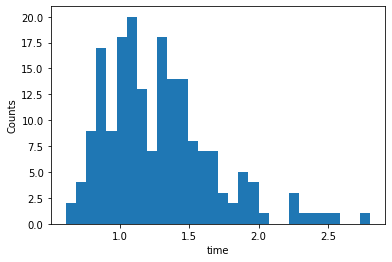

In [22]:
d = {}
find_dic(df_clicktimer)

x = np.array(list(d.values()))
plt.hist(x, bins=30)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('time');


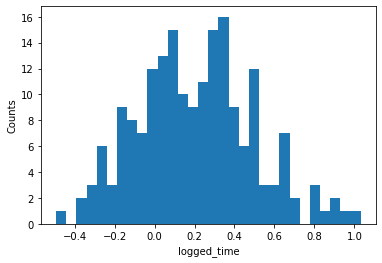

In [23]:
x_log = np.log(np.array(list(d.values())))

plt.hist(x_log, bins=30)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('logged_time');

In [24]:
def get_suspious_time_user(s,z):
    
    time_std_flag = np.mean(s) - np.std(s)*z
    time_std_flag

    return [name for name, time in d.items() if time <= time_std_flag]

get_suspious_time_user(x,1.5)

['5e713fbfc1c99805c7c03aeb', '5c2fb1412c45d400014ae103']

In [25]:
flag_list = flag_list + get_suspious_time_user(x,1.5)
Counter(flag_list)

Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 2,
         '5c6dc008b027110001ada68a': 4,
         '5c0d109e73986d0001785b39': 2,
         '5e86366d568c630d55dbfe3b': 3,
         '5c9f84909e01ef001897db75': 3,
         '5dd5211a4ad3e24c93d3c65b': 2,
         '5d4af314cf8a4700010f409d': 1,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1,
         '5e8efc69dc9b18027705fc4b': 2,
         '5be0662a96c08200013b8fc2': 2,
         '5dcc61ad900e3e8fe2aa68aa': 3,
         '5e7e0473fc5712039e96e6a2': 1,
         '5adfa601eb6040000153a828': 2,
         '5e728edbc33987088002eed4': 1,
         '5e475a68a95b8c226a442bfb': 2,
         '5d3a10f0708b4f0001aa2513': 2,
         '5e3ff59bf2160b23942ada93': 1,
         '5d40706844220d00191363da': 1,
         '5e1dcb521a938a1356cc585e': 1,
         '5e81acd02c3f6989a2f0a8e0': 1,
         '5e2712e1f1fa1b9422ea194a': 1,


# 5. Mouse Activity Related -- average_click_delay
Average time taken between one click and the next; aggregated by user

In [26]:
def count_click_inPage(x):
    
    count = 0 
    
    for item in x:
        if item[0] == 'c':
            count += 1 
    
    return count

def get_pd(df1):
    
    name = df1.prolific_id.iloc[0]
    
    for i in range(len(df1.prolific_id)):
        
        try:
            df1.prolific_id.iloc[i] = count_click_inPage(df1.mouse_track.iloc[i]['frames'])
            df1.mouse_track[i] = df1.mouse_track.iloc[i]['timeElapsed']
        
        except:
            df1.prolific_id.iloc[i] = 0.001
            df1.mouse_track[i] = 0
     
    df1 = df1.rename(columns={"prolific_id": "Count", "mouse_track": "timeElapsed"})
    df1[name] = df1.timeElapsed/df1.Count
    
    return df1

def get_concated_pd(usr):
    
    ff = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        ff = pd.concat([ff, get_pd(f)], axis = 1)
    
    return ff[ff.columns[2::3]]

In [27]:
subFlag1_df = get_concated_pd(user_id)
subFlag1_df


,5bd6f3369c5d1f000195e70c,5a4cc59d30adf700015cc9c0,5baf6705848bbd0001d6fc8a,5badf0aeae1d020001df2cc7,5e3df34cfb9ed506f1028bb5,5e980cf3b3aaca000b89841e,5e84b06e7e76840445362846,5b81d72a3c13750001995473,5adcd1c8dee8590001b026a8,5e0ef113805a30621e0e3c01,...,5c44b3fe1bbffd0001014286,5e8db02f9b5ff0033fb25a8a,5d4602322f66d0001a1208c7,5e5fbff6de7bcc2fc7f396db,5e8518347ad752103913de56,5e838c1605d2ad0c14ed684b,5dbc534dcc227d1f37845307,5c3ce3a6de04ad0001d8a6cc,5d2b45b9f7ef930001c5fa2d,5e19b97a8a76fb239d3e33d6
page1,6.27,12.169,61.088,6.192,114.73,11.943,8.708,18.011,1.328,12.754,...,17.47,1.555,986.42,16.52,44.216,1.27583,6.267,3.417,39.251,58.6702
page10,3.45969,1.58631,1.69314,2.40389,1.71023,1.41039,2.50913,3.64075,1.15774,1.94985,...,1.27973,1.05519,1.27911,1.18287,2.0922,2.06886,2.3415,1.63644,7.12376,3.19656
page11,6.00963,1.57183,2.04925,2.5225,1.59415,1.81733,2.38659,2.03469,0.950765,1.93572,...,1.18943,1.38755,1.07205,1.22056,1.84117,0.918727,3.46726,2.32619,14.0026,3.90565
page12,7.88231,1.48476,1.77767,2.53906,1.55962,1.53144,2.17022,2.94782,1.00718,1.39735,...,1.43762,1.51276,1.34342,1.13418,2.10844,1.002,12.1889,1.43756,6.67406,3.46944
page13,11.2932,21.3844,2.02606,2.29875,1.4438,1.73424,2.176,2.25944,0.756278,1.17872,...,1.23736,4.22,1.34726,1.16706,1.57731,2.06295,3.71475,1.68225,6.44475,3.30175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,4.25234,1.69406,2.63756,3.15097,3.01225,3.26049,5.89807,5.4106,1.55568,2.29483,...,1.22974,2.32845,2.5671,1.99813,2.06835,8.51008,3.65699,3.27124,2.84885,3.18848
page72,1.55711,1.23782,2.06102,3.00867,4.22605,2.42105,2.57079,1.92419,1.25882,1.88015,...,1.3195,0.985871,2.5652,1.17897,1.60273,81.0283,2.96419,2.27272,2.17178,1.39722
page73,7.02336,0.960623,1.44995,1.74008,6.10433,2.93171,1.58976,1.33379,0.678589,1.37316,...,1.0756,0.616507,1.68907,1.02095,0.909492,27.5177,2.52895,1.58115,1.40573,1.20681
page8,5.06378,2.85653,4.35852,3.03537,2.44978,1.68612,3.13876,7.565,0.8759,2.06763,...,1.253,1.03377,1.38033,1.12469,2.74182,1.3765,2.53677,2.37906,5.02682,3.04818


In [28]:
def find_subFlag1(df,n):
    

    #sawp the index and the columns
    data = df.transpose()

    l = []
    for pg in list(data.columns):
        a = data[[pg]].astype(float)
        l = l + list(a.nsmallest(n,a).index)

    counts = Counter(l)
    new_list = sorted(l, key=counts.get, reverse=True)
    d_subFlag = Counter(new_list)

    x = list(Counter(l).values())
    sub_flag_threhold = np.array(x).mean() + 1.5*np.array(x).std()
    
    return [name for name, count in d_subFlag.items() if count >= sub_flag_threhold]


In [29]:
flag_list = flag_list + find_subFlag1(subFlag1_df,5)
Counter(flag_list)


Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 3,
         '5c6dc008b027110001ada68a': 4,
         '5c0d109e73986d0001785b39': 2,
         '5e86366d568c630d55dbfe3b': 3,
         '5c9f84909e01ef001897db75': 4,
         '5dd5211a4ad3e24c93d3c65b': 3,
         '5d4af314cf8a4700010f409d': 1,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1,
         '5e8efc69dc9b18027705fc4b': 2,
         '5be0662a96c08200013b8fc2': 2,
         '5dcc61ad900e3e8fe2aa68aa': 3,
         '5e7e0473fc5712039e96e6a2': 1,
         '5adfa601eb6040000153a828': 2,
         '5e728edbc33987088002eed4': 1,
         '5e475a68a95b8c226a442bfb': 2,
         '5d3a10f0708b4f0001aa2513': 2,
         '5e3ff59bf2160b23942ada93': 1,
         '5d40706844220d00191363da': 1,
         '5e1dcb521a938a1356cc585e': 1,
         '5e81acd02c3f6989a2f0a8e0': 1,
         '5e2712e1f1fa1b9422ea194a': 1,


# 6. Distance Related -- Total Distance
Total distance traveled by the user (Euclidean distance)

In [30]:
def calc_distance(x1, y1, x2, y2):
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2)
    return distance

def calc_one_page_tol_dis(pg_dict):
    old_x = 0
    old_y = 0
    total_distance = 0
    count = 0
    for element in pg_dict:
        if count == 1:
            fake_distance = total_distance 

        if element[0] == 'm':
            new_x = element[1]
            new_y = element[2]

            distance = calc_distance(old_x, old_y, new_x, new_y)
            total_distance += distance
            old_x = new_x
            old_y = new_y
            count += 1
    return total_distance - fake_distance

def calc_one_person_total_distance(page_detail):
    person_total_distance = 0
    df_pg = pd.DataFrame(columns={'PageTotDist'},index = page_detail.index)
    for pg in page_detail.index:
        
        try:
            one_page_tot_dist = calc_one_page_tol_dis(page_detail.loc[pg]['mouse_track']['frames'])
            df_pg.loc[pg]['PageTotDist'] = one_page_tot_dist
            person_total_distance += one_page_tot_dist
        except:
            pass
        
    return person_total_distance, df_pg

def page_distance_comparison(total_user):
    df_user = pd.DataFrame(columns={'PersonTotDist'}, index = total_user)
    temp_df = pd.DataFrame()
    for name in total_user:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            page_detail = pd.read_json(f_input)
            totDistperPerson, df_pg = calc_one_person_total_distance(page_detail)
            df_pg.columns = {name} 
            temp_df = pd.concat([temp_df, df_pg], axis=1, sort=False)
            df_user.loc[name]['PersonTotDist'] = float(totDistperPerson)   
    
    return temp_df

In [31]:
subFlag2_df = page_distance_comparison(user_id)
subFlag2_df


,5bd6f3369c5d1f000195e70c,5a4cc59d30adf700015cc9c0,5baf6705848bbd0001d6fc8a,5badf0aeae1d020001df2cc7,5e3df34cfb9ed506f1028bb5,5e980cf3b3aaca000b89841e,5e84b06e7e76840445362846,5b81d72a3c13750001995473,5adcd1c8dee8590001b026a8,5e0ef113805a30621e0e3c01,...,5c44b3fe1bbffd0001014286,5e8db02f9b5ff0033fb25a8a,5d4602322f66d0001a1208c7,5e5fbff6de7bcc2fc7f396db,5e8518347ad752103913de56,5e838c1605d2ad0c14ed684b,5dbc534dcc227d1f37845307,5c3ce3a6de04ad0001d8a6cc,5d2b45b9f7ef930001c5fa2d,5e19b97a8a76fb239d3e33d6
page1,1049.13,1145.95,7772.22,1628.79,5031.6,525.16,2210.06,3052.99,920.544,2149.8,...,3560.44,2144.79,8599.3,1496.38,10202.5,1388.82,829.419,872.031,0,6355.68
page10,5803.7,8135.58,10148.5,6044.12,13230.9,8697.87,5366.72,7628.74,9270.93,7961.86,...,12345.8,7262.01,6395.11,6616.82,8403.75,14161.4,7213.23,8586.1,1898.92,7879.45
page11,13497.6,9603.44,11067,4627.61,11127.7,11382.3,4989.27,7800.09,7616.15,8195.44,...,10742.1,7896.01,7793.94,6992.79,8781.74,7343.98,9361.28,15807.4,1340.23,7646.81
page12,8333.2,10068.2,9954.3,5132.05,11842,6727.55,6769.34,10002.2,8012.92,7350.74,...,12328.1,5395.64,6780.08,7185.61,6574.83,7295.62,11308.7,10287.5,2607.05,7223.98
page13,11878.5,11220.5,9432.8,5134.34,10649.8,7541.17,5535.22,5936.59,6185.32,8053.73,...,11334.2,7326.18,8003.31,7573.62,6615.2,9081.86,12401.4,11445.2,3089.5,7502.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,30933.8,9073.78,28306.9,6336.13,12940.6,8996.78,7039.88,9031.26,11075.3,6732.76,...,10595.7,12277.7,26609.2,6400.99,9493.52,14488.8,27608.6,13723.3,7768.25,16202
page72,11089.4,5019.62,14930.8,7337.06,5941.54,5330.59,3927.36,8256.17,5056.22,5062.75,...,14842.6,6709.58,17262.4,4938.28,4644.19,3157.94,16593.6,8600.54,4054.68,8833.28
page73,10326.8,4593.19,11041.8,4204.39,1517.95,5596.79,3505.19,4241.4,5290.78,4106,...,12298.8,3830.26,9433.48,5429.92,5357.18,1718.99,13085.2,9883.09,3203.23,15437
page8,9129.87,11750.3,13357.8,5592.58,13760.8,7647.3,5967.61,9284.15,9902.59,8243.83,...,11633.2,7228.83,7578.93,7167.76,10132.1,10689.2,7557.16,12171.1,2345.54,7490.37


In [32]:
def find_subFlag2(df,n):
    
    #sawp the index and the columns
    data = df.transpose()

    l = []
    for pg in list(data.columns):
        a = data[[pg]].astype(float)
        l = l + list(a.nsmallest(n,a).index)

    counts = Counter(l)
    new_list = sorted(l, key=counts.get, reverse=True)
    d_subFlag = Counter(new_list)

    x = list(Counter(l).values())
    sub_flag_threhold = np.array(x).mean() + 1.5*np.array(x).std()
    
    return [name for name, count in d_subFlag.items() if count >= sub_flag_threhold]


In [33]:
flag_list = flag_list + find_subFlag2(subFlag2_df,5)
Counter(flag_list)


Counter({'5a4cc59d30adf700015cc9c0': 1,
         '5adcd1c8dee8590001b026a8': 3,
         '5c6dc008b027110001ada68a': 4,
         '5c0d109e73986d0001785b39': 2,
         '5e86366d568c630d55dbfe3b': 3,
         '5c9f84909e01ef001897db75': 4,
         '5dd5211a4ad3e24c93d3c65b': 3,
         '5d4af314cf8a4700010f409d': 2,
         '5c3f7c6329966300010dce78': 1,
         '5e7009d7b3d2255e174696cd': 1,
         '5dd66c10f83c9f5ef3a7bc0b': 1,
         '5b872a3b22f6ff0001f0d2b1': 1,
         '5e8efc69dc9b18027705fc4b': 2,
         '5be0662a96c08200013b8fc2': 2,
         '5dcc61ad900e3e8fe2aa68aa': 3,
         '5e7e0473fc5712039e96e6a2': 2,
         '5adfa601eb6040000153a828': 2,
         '5e728edbc33987088002eed4': 1,
         '5e475a68a95b8c226a442bfb': 2,
         '5d3a10f0708b4f0001aa2513': 2,
         '5e3ff59bf2160b23942ada93': 1,
         '5d40706844220d00191363da': 1,
         '5e1dcb521a938a1356cc585e': 1,
         '5e81acd02c3f6989a2f0a8e0': 1,
         '5e2712e1f1fa1b9422ea194a': 1,


In [34]:
#list of suspious user
#pd.DataFrame.from_dict(Counter(flag_list),orient='index')
sus_usr = [name for name, count in Counter(flag_list).items() if count >= 2]
sus_usr

['5adcd1c8dee8590001b026a8',
 '5c6dc008b027110001ada68a',
 '5c0d109e73986d0001785b39',
 '5e86366d568c630d55dbfe3b',
 '5c9f84909e01ef001897db75',
 '5dd5211a4ad3e24c93d3c65b',
 '5d4af314cf8a4700010f409d',
 '5e8efc69dc9b18027705fc4b',
 '5be0662a96c08200013b8fc2',
 '5dcc61ad900e3e8fe2aa68aa',
 '5e7e0473fc5712039e96e6a2',
 '5adfa601eb6040000153a828',
 '5e475a68a95b8c226a442bfb',
 '5d3a10f0708b4f0001aa2513',
 '5e8f1b4f8028051d6c8bc9f0',
 '5e713fbfc1c99805c7c03aeb']

# Chapter 3: Data Engineering: Generating mouse movement features from Non-Suspious users 


In [35]:
user_id_new = list(set(user_id).difference(set(sus_usr)))
#length = 190 - 16 = 174

# 1. Number of Action
determines the number of action

In [39]:
def cal_action(df):
    for i in range(len(df)):
        try:
            df['mouse_track'].iloc[i] = len(df.mouse_track.iloc[i]['frames'])
            
        except:
            df['mouse_track'].iloc[i] = 0
    
    userid = df.prolific_id.iloc[0]
    df = df.rename(columns={"mouse_track": userid})

    return df.drop(columns=['prolific_id'])

def get_concated_action(usr):
    
    final_action = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        final_action = pd.concat([final_action, cal_action(f)], axis = 1)
    
    return final_action 
    
            

In [40]:
action_df = get_concated_action(user_id_new)
action_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,151,888,61,100,115,95,115,112,20,157,...,195,136,104,30,270,248,216,135,326,251
page10,904,2620,644,588,682,922,560,662,274,1081,...,1264,898,328,653,790,2176,841,208,1150,471
page11,943,3599,664,547,676,864,660,908,246,1025,...,1083,778,356,538,796,1709,965,271,1035,594
page12,920,1658,751,834,719,805,404,751,351,1361,...,758,635,489,398,717,1839,970,476,963,665
page13,850,2279,686,495,702,816,333,1000,300,1124,...,1019,752,371,586,778,1822,874,350,913,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,2923,15957,2438,3103,3092,2882,802,4316,907,5557,...,3164,3887,639,2813,3975,8761,3353,769,4101,1649
page72,2187,6474,1414,1372,2090,2629,424,1779,429,2472,...,1711,1291,1223,1873,2158,9599,1601,393,2065,416
page73,1481,5195,1644,1214,1813,1493,292,1729,522,1713,...,1541,1461,325,1481,1697,4178,1261,500,1891,415
page8,888,2389,657,674,659,817,545,715,450,1116,...,1141,713,528,659,994,2233,759,558,1008,569


# 2. Delay Time
measures the total amount of time when mouse movement was in delay.

In [224]:
def cal_delayTime(f):
    
    for i in range(len(f)):            
        try:
            l = f.mouse_track.iloc[i]['frames'][1:]
            x = []
            for j in range(len(l)):
                x.append(l[j][1:3])  
            a = Counter(map(tuple, x))
            delay_user = [list(item) for item, count in a.items() if count > 1]

            #delete the delay_user who has the same point but not continously acted
            for item in delay_user:
                idx = list(x).index(item)
                if x[idx+1] != x[idx]:
                    delay_user.remove(item)

            dic = {}
            for item in delay_user:
                idx = list(x).index(item)
    
                try:

                    if x[idx+1] == x[idx] and x[idx+2] != x[idx]:
                        dic[str(l[idx][1:3])] = l[idx+1][-1] - l[idx][-1] 

                    elif x[idx+1] == x[idx] and x[idx+2] == x[idx]:
                        dic[str(l[idx][1:3])] = l[idx+2][-1] - l[idx][-1] 

                except:
                    if x[idx+1] == x[idx]:
                        dic[str(l[idx][1:3])] = l[idx+1][-1] - l[idx][-1] 
            
            f.iloc[i].mouse_track = dic
 
        except:
            f.iloc[i].mouse_track = 0
    
    userid = f.prolific_id.iloc[0]
    f = f.rename(columns={"mouse_track": userid})
    
    return f.drop(columns=['prolific_id'])

def get_concated_delayTime(usr):
    
    delayTime = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        delayTime = pd.concat([delayTime, cal_delayTime(f)], axis = 1)
    
    
    return delayTime


In [225]:
delayTime_df = get_concated_delayTime(user_id_new)
delayTime_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,"{'[1535, 48]': 0.19300007820129395, '[400, 682...","{'[883, 849]': 0.08500003814697266}","{'[250, 562]': 0.13499999046325684}","{'[306, 673]': 0.3299999237060547}","{'[809, 556]': 0.993000030517579, '[382, 733]'...","{'[236, 561]': 0.3579998016357422}","{'[59, 664]': 0.039999961853027344}","{'[556, 834]': 0.18699979782104492}","{'[88, 621]': 0.0019998550415039062}","{'[775, 342]': 0.016999959945677823, '[307, 64...",...,"{'[569, 838]': 0.04900002479553223}","{'[588, 814]': 0.06700015068054199}","{'[0, 430]': 0.032000064849853516, '[0, 454]':...","{'[74, 34]': 0.002000093460083008, '[235, 641]...","{'[816, 102]': 0.3529999256134033, '[1535, 339...","{'[777, 581]': 0.022000074386597002, '[778, 58...","{'[314, 604]': 0.13100004196166992}","{'[158, 674]': 0.03399991989135742}","{'[1352, 68]': 0.33899998664855957, '[319, 619...","{'[83, 734]': 0.003000020980834961}"
page10,"{'[436, 515]': 0.23399996757507324, '[694, 502...","{'[806, 465]': 0.006999969482421986, '[806, 46...","{'[288, 291]': 0.059999942779541904, '[583, 28...","{'[306, 361]': 0.03400015830993697, '[310, 361...","{'[508, 536]': 0.066999912261963, '[512, 529]'...","{'[328, 290]': 0.31699991226196333, '[623, 281...","{'[277, 601]': 0.03600001335144043, '[196, 717...","{'[592, 501]': 0.016000032424927202, '[928, 49...","{'[239, 170]': 0.0019998550415039062, '[250, 2...","{'[289, 498]': 0.012000083923339178, '[308, 50...",...,"{'[647, 503]': 0.562999963760376, '[936, 486]'...","{'[658, 477]': 0.042999982833862305, '[885, 48...","{'[153, 397]': 0.0009999275207519531, '[0, 624...","{'[680, 175]': 0.1700000762939453, '[370, 327]...","{'[1512, 130]': 0.1900000572204591, '[1535, 62...","{'[1203, 446]': 0.0, '[1181, 443]': 0.00100016...","{'[323, 485]': 0.04500007629394531, '[668, 489...","{'[188, 478]': 0.03399991989135831, '[543, 483...","{'[1359, 169]': 0.12299990653991699, '[380, 30...","{'[135, 519]': 0.003000020980834961, '[154, 38..."
page11,"{'[385, 495]': 0.289999961853028, '[752, 486]'...","{'[1058, 909]': 0.003999948501587136, '[1047, ...","{'[373, 197]': 0.093999862670898, '[688, 290]'...","{'[190, 307]': 0.992000102996826, '[607, 477]'...","{'[452, 530]': 0.0009999275207519531, '[697, 5...","{'[279, 489]': 0.14900016784668013, '[577, 486...","{'[207, 545]': 0.036000013351440874, '[167, 69...","{'[596, 500]': 0.1510000228881836, '[994, 501]...","{'[226, 431]': 0.002000093460083008, '[230, 56...","{'[316, 529]': 0.032999992370605025, '[317, 52...",...,"{'[647, 490]': 0.3059999942779541, '[948, 496]...","{'[644, 484]': 0.19700002670288086, '[945, 476...","{'[0, 165]': 0.01600003242492587, '[0, 166]': ...","{'[201, 447]': 0.14100003242492587, '[358, 385...","{'[404, 520]': 0.14599990844726607, '[756, 518...","{'[1336, 444]': 0.0010001659393310547, '[1324,...","{'[374, 483]': 0.14999985694885254, '[711, 488...","{'[242, 471]': 0.03399991989135698, '[540, 471...","{'[324, 473]': 0.07999992370605469, '[621, 482...","{'[156, 414]': 0.003000020980834961, '[153, 48..."
page12,"{'[1535, 56]': 0.1979999542236328, '[472, 302]...","{'[869, 514]': 0.005999803543090931, '[899, 49...","{'[334, 298]': 0.0980000495910649, '[629, 294]...","{'[291, 481]': 0.02099990844726518, '[618, 506...","{'[425, 525]': 0.05399990081787098, '[424, 525...","{'[331, 483]': 0.06200003623962402, '[585, 487...","{'[157, 625]': 0.04200005531311035, '[197, 678...","{'[845, 490]': 0.07199978828430176, '[846, 491...","{'[188, 443]': 0.0009999275207519531, '[190, 4...","{'[308, 503]': 0.03400015830993586, 

In [226]:
#save this file to the local file, since the above function takes time to run 
#delayTime_df.to_csv("/Users/guapofish/Desktop/mouse_track_data_190_users/delayTime_df_output.csv")

#delayTime_df = pd.read_csv("/Users/guapofish/Desktop/mouse_track_data_190_users/delayTime_df_output.csv")


# 3.Number of Delay: 
how many times the Trajectory was in delay

In [232]:
copy_delayTime = delayTime_df.copy()

def get_delay_df(df):
       
    for col in list(df.columns):  
        for row in range(len(df)):
            try:
                df[col].iloc[row] = len(df[col].iloc[row])
            except:
                df[col].iloc[row] = 0
    
    return df

delay_df = get_delay_df(copy_delayTime)
delay_df


,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,2,1,1,1,2,1,1,1,1,10,...,1,1,3,2,3,109,1,1,2,1
page10,22,74,18,23,32,16,20,22,16,60,...,19,16,26,45,21,757,16,16,24,16
page11,23,95,16,25,29,16,17,24,19,85,...,19,20,33,43,17,701,20,16,22,16
page12,28,35,16,30,32,16,17,23,17,53,...,21,17,32,27,17,742,18,16,23,16
page13,22,65,16,24,33,16,16,27,21,81,...,19,18,28,49,18,723,17,16,22,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,110,727,75,153,220,69,76,106,90,789,...,102,77,114,309,89,2720,80,72,77,80
page72,81,306,58,84,138,52,52,59,74,437,...,58,60,99,244,57,3437,49,51,48,53
page73,68,235,64,68,131,48,57,66,71,221,...,65,57,78,165,61,1381,55,50,51,55
page8,20,64,15,28,37,16,17,20,17,68,...,20,17,39,52,20,889,16,17,22,16


# 4. Number of Point in the trajectory: 
The number of point for a certain interval, where there is no idle time or delay of work.

In [402]:
def read_x(name):
    with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
        f = pd.read_json(f_input)
    return f 


def cal_numofPt(df,df2):
    '''
    df:delayTime_df
    df2:action_df
       
    '''
    df_output = df2.copy()
    df_col_list = list(df.columns)

    for col in df_col_list:
        for row in range(72):
            
            if df[col].iloc[row] == 0:
                df_output[col].iloc[row] = df2[col].iloc[row]
                
            else: 
                #'[x,y]' to [x,y]
                t = list(ast.literal_eval(','.join(list(df[df_col_list[0]].iloc[row].keys()))))

                l = read_x(col).mouse_track.iloc[row]['frames'][1:]
                x = []
                for j in range(len(l)):
                    x.append(l[j][1:3])  

                count = 0 

                for item in t:

                    if item in x:
                        idx = x.index(item) 

                        try:
                            if x[idx] == x[idx+1] and x[idx] == x[idx+2]:
                                count +=3
                            elif x[idx] == x[idx+1] and x[idx] != x[idx+2]:
                                count +=2
                        except:
                            if x[idx] == x[idx+1]:
                                count +=2

                df_output[col].iloc[row] = df2[col].iloc[row] - count 

    return df_output
            
       

In [403]:
numofPt_df = cal_numofPt(delayTime_df,action_df)
numofPt_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,147,888,61,100,115,95,115,112,20,157,...,195,136,104,30,270,248,216,135,326,251
page10,859,2620,644,588,682,922,560,662,274,1081,...,1264,898,328,653,790,2176,841,208,1150,471
page11,895,3599,664,547,676,864,660,908,246,1025,...,1083,778,356,538,796,1709,965,271,1035,594
page12,863,1658,751,834,719,805,404,751,351,1361,...,758,635,489,398,717,1839,970,476,963,665
page13,805,2279,686,495,702,816,333,1000,300,1124,...,1019,752,371,586,778,1820,874,350,913,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,2702,15957,2438,3103,3092,2882,802,4316,907,5557,...,3164,3887,639,2813,3975,8755,3353,769,4101,1649
page72,2024,6474,1414,1372,2090,2629,424,1779,429,2472,...,1711,1291,1223,1873,2158,9597,1601,393,2065,416
page73,1342,5195,1644,1214,1813,1493,292,1729,522,1713,...,1541,1461,325,1481,1697,4178,1261,500,1891,415
page8,848,2389,657,674,659,817,545,715,450,1116,...,1141,713,528,659,994,2233,759,558,1008,569


In [404]:
#save this file to the local file, since the above function takes time to run 
#numofPt_df.to_csv("/Users/guapofish/Desktop/mouse_track_data_190_users/numofPt_df_output.csv")

#numofPt_df = pd.read_csv("/Users/guapofish/Desktop/mouse_track_data_190_users/numofPt_df_output.csv")

# 5.STDEV of the horizonal Verlocity
first calculating point to point horizontal speed then standard division of these each id's std of velocity on each page.

In [405]:
def horizontal_velocity(f):

    for j in range(len(f)):
        try:   
            directions = f.mouse_track.iloc[j]['frames']
            png = []
        
            for i in range(len(directions)-1):
                vec2 = int(directions[i+1][1])
                vec1 = int(directions[i][1])
                tim1 = float(directions[i][-1])
                tim2 = float(directions[i+1][-1])
                norm1 = vec2 -vec1   
                norm2 = tim2 -tim1
             
                if norm2 != 0:

                    speed = float(abs(norm1/norm2))
                    png.append(speed)

                else:
                    png.append(0)

            f.mouse_track.iloc[j] = np.array(png).std()
        except:
            
            f.mouse_track.iloc[j] = 0
            
        
    userid = f.prolific_id.iloc[0]
    f = f.rename(columns={"mouse_track": userid})
    
    return f.drop(columns=['prolific_id'])


def get_horizontal_in_pg(usr):
    
    final_hor = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        final_hor = pd.concat([final_hor, horizontal_velocity(f)], axis = 1)
    
    return final_hor

In [406]:
horizontal_v_df = get_horizontal_in_pg(user_id_new)
horizontal_v_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,1340.24,35356.1,864.481,389.13,4124.58,19467.5,2.07606,134820,3.86054,3190.51,...,821.094,71705.9,3.47311,692.853,2465.3,24027.6,1001.08,0.972473,981.854,4.35846
page10,2744.66,34653.8,51701.7,10150.1,85722.8,53532.1,115.348,55555.3,504.349,899.136,...,271000,71813.3,453.425,2104.55,53705.4,28542.2,14206.1,240.061,4465.96,171.162
page11,2152.99,35563.5,35557.7,2708.78,77079.8,63716.5,121.046,126137,509.18,2759.55,...,257742,59273.8,463.929,1269.39,27483,36507.4,25437.2,240.608,1386.93,308.883
page12,3045.31,33159.9,4686.53,1262.97,117647,56417.7,419.08,93062.6,924.831,1796.23,...,184439,62753.3,590.032,1580.55,16699.4,35572,16306.4,205.17,1310.15,208.434
page13,2754.81,50971.4,33847.6,1077.63,90264.7,47001.3,847.425,43830.5,181.325,936.732,...,249426,39093.9,726.317,1166.71,1653.63,35668.7,39844.5,277.429,1334.98,296.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,2209.64,11243.1,6675.05,360.467,30696.4,20100.3,242.4,27660.7,179.596,105.34,...,45785.5,45538.5,119.283,163.158,8740.47,4782.01,9035.98,40.6963,958.542,187.471
page72,1853.66,6734.21,511.337,184.688,22280.7,43123.3,37.0802,43713.3,166.233,183.522,...,102824,3514.27,20.6495,155.072,2423.8,11880.2,6212.06,60.0267,833.537,155.109
page73,39992.7,39531.4,13092,202.814,24790.1,22291.5,50.2187,37775.9,28.2031,363.65,...,99745.9,35169,57.0702,185.263,2417.06,20182.7,15904.3,48.8739,864.695,38.7258
page8,4184.4,44542.6,2369.19,1151.2,76815.7,64182.8,136.29,80685.1,330.957,712.891,...,151710,97147.7,712.901,1463.76,24908.8,57775.3,1585.78,1078.25,2789.99,460.472


# 6.STDEV of the vertical Verlocity:
first calculating point to point vertical speed then standard division of these each id's std of velocity on each page.

In [1006]:
def vertical_velocity_std(f):

    for j in range(len(f)):
        try:   
            directions = f.mouse_track.iloc[j]['frames']
            png = []
        
            for i in range(len(directions)-1):
                vec4 = int(directions[i+1][2])
                vec3 = int(directions[i][2])
                tim3 = float(directions[i][-1])
                tim4 = float(directions[i+1][-1])
                norm3 = vec4 -vec3   
                norm4 = tim4 -tim3

                
                if norm4 != 0:

                    speed = float(abs(norm3/norm4))
                    png.append(speed)

                else:
                    png.append(0)

            f.mouse_track.iloc[j] = np.array(png).std()
        except:
            
            f.mouse_track.iloc[j] = 0
            
        
    userid = f.prolific_id.iloc[0]
    f = f.rename(columns={"mouse_track": userid})
    
    return f.drop(columns=['prolific_id'])


def get_vertical_in_pg(usr):
    
    final_ver = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        final_ver = pd.concat([final_ver, vertical_velocity_std(f)], axis = 1)
    
    return final_ver

In [1007]:
vertical_v_df = get_vertical_in_pg(user_id_new)
vertical_v_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,1240.09,3455.36,436.033,589.168,2826.55,14849.4,331.57,87605.6,1347.91,457.771,...,593.11,73918.9,287.148,2955.97,585.836,5269.57,671.084,95.4044,426.091,424.852
page10,1530.14,12018.2,69842.3,8803.36,37560.2,41687.2,1546.04,36565.9,10633.3,344.555,...,62286.3,33818.5,13644.5,2147.13,40775.3,13628.7,25981.5,315.12,1643.9,2169.55
page11,586.294,19844.8,38624,894.798,27102.7,45736.2,1720.68,46027.5,13909,687.567,...,91744.2,9995.06,12555.2,721.9,10572.1,8397.74,42227.5,265.165,432.301,7809.15
page12,1119.68,12589.8,5238.07,1020.96,47655.4,34553.4,8310.94,50058.2,15699.2,1057.2,...,57711.4,14954.1,12500,752.253,21467.8,14040.4,45486.1,463.621,517.871,3343.02
page13,602.192,22874.2,29721.2,873.925,30270.9,20031,13421.5,38799.4,2392.19,446.222,...,65706.6,7313.88,12266.2,639.447,854.869,12267.6,41435.2,465.739,474.81,7258.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,987.207,8232.63,21771,319.048,43783.4,49480.2,3781.74,20190.4,2469.62,152.599,...,13432.1,16448.9,932.437,239.207,9718.07,7495.34,21592.4,143.935,339.682,3188.47
page72,689.305,5415.52,540.904,290.645,12962.4,19980.2,761.828,21340,2368.13,447.899,...,33189.1,2629.93,835.273,236.695,979.498,4449.08,3063.16,2754.44,309.982,2613.26
page73,9096.06,21633.3,3274.43,335.259,19666.3,23646.2,1418.33,1682.71,1077.55,503.183,...,44122.9,13035.8,1358.28,460.706,1024.01,12081.6,23683.4,1125.51,333.522,1120.99
page8,1345.54,18852.9,2550.83,830.453,27520.4,49786.4,1792.33,52407.7,10352.4,374.098,...,40217.2,24828.2,12065.9,969.442,18827.1,26381.2,1436.6,902.103,817.637,8262.4


In [ ]:
with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/5bd6f3369c5d1f000195e70c.json', encoding='utf-8-sig') as f_input:
    df1 = pd.read_json(f_input)

df1.head()   

# 7. MOVEMENT ELAPSED TIME
Elapsed time is time difference between starting point and ending point of a mouse movement

In [426]:
def cal_time(df):
    
    name = df.prolific_id.iloc[0]    
    for i in range(len(df.prolific_id)):        
        try:           
            df.mouse_track[i] = df.mouse_track.iloc[i]['timeElapsed']
        
        except:           
            df.mouse_track[i] = 0
    
    userid = df.prolific_id.iloc[0]
    df = df.rename(columns={"mouse_track": userid})
    
    return df.drop(columns=['prolific_id']) 
    
def get_time_df(usr):
    
    final_time = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        final_time = pd.concat([final_time, cal_time(f)], axis = 1)
    
    return final_time


In [428]:
elapsed_time_df = get_time_df(user_id_new)
elapsed_time_df.head()

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,58.482,29.567,7.867,26.3,31.949,5.776,27.375,15.214,7.195,6.476,...,32.539,11.361,9.93,3.045,183.264,4.415,10.848,37.327,17.727,23.31
page10,146.904,31.926,20.859,26.397,16.982,30.793,85.729,23.136,20.222,34.729,...,31.753,36.315,22.249,518.477,35.556,44.681,35.315,51.744,35.26,61.349
page11,42.178,47.624,20.868,22.693,16.587,24.915,55.636,116.467,21.652,31.823,...,22.571,21.795,21.8,21.729,40.985,24.496,45.169,44.951,109.392,29.64
page12,141.481,25.743,20.53,119.489,17.14,27.595,62.036,40.056,22.946,47.799,...,19.299,22.556,30.277,15.86,31.998,25.648,43.217,47.092,30.612,24.102
page13,37.241,26.999,21.104,19.965,43.276,23.977,53.048,106.193,26.638,39.52,...,21.672,19.923,24.027,19.121,36.469,26.272,51.234,39.962,33.296,43.252


# 8.1 Total Length of "moved" Trajectory
measures the point to point distance of the trajectory with ONLY 'm' sign in the dictionary



In [417]:
#This is the total distance of each id's page we calculated before 
total_distance_df = subFlag2_df[user_id_new]
total_distance_df.head()

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,3976.44,7470.78,540.692,750.156,2200.03,1512.36,0,2015.91,0,1101.16,...,2208.35,771.885,0,721.595,7772.22,1952.44,1811.63,0,2469.08,0
page10,13294.7,16451.4,6344.86,5875.13,6866.38,9150.08,2295.39,9462.3,1287.12,7448.16,...,10041.1,8805.52,3179.95,10950.3,10148.5,10666,9639.72,6334.89,12516.1,1782.22
page11,11624.7,19246.9,7168.8,5673.74,7307.9,8857.85,1471.88,11982.7,1274.27,6883.97,...,9413.24,9037.22,1770.63,6698.11,11067,9181.54,10552.4,6060.51,10957.6,2636.72
page12,15120.6,9793.92,8080.28,8094.57,6637.55,8358.59,1635.04,16086.2,1112.05,8694.69,...,8083.43,7514.09,3246.72,6040.64,9954.3,10211.8,9515.28,6399.67,10323.8,2459.42
page13,12519.5,13455.2,7632.79,4823.41,8611.12,8775.27,2288.52,21164.5,2095.79,7059.01,...,9990.55,8273.84,2860.21,6188.75,9432.8,10129.6,10508,6128.75,10864.2,2528.47


# 8.2 Averaged Length of Trajectory

This is the average distance of each id's trajectory considering all the actions, and we are using this Average_cumulative_distance_df for the future machine learning part

In [939]:
#generate a new df for storing the mouse movement dictionary value

def read_file(name):    
    with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json',
              encoding='utf-8-sig') as f_input:
        f = pd.read_json(f_input)
        userid = f.prolific_id.iloc[0]
        f = f.rename(columns={"mouse_track": userid})    
    return f.drop(columns=['prolific_id'])
        
def get_dfx(usr):    
    final = pd.DataFrame(index = df1.index)    
    for name in usr:              
        final = pd.concat([final, read_file(name)], axis = 1)    
    return final


In [940]:
df_new = get_dfx(user_id_new)
df_new.head()


,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,"{'frames': [['s', 0, 0], ['m', 1428, 5, 9.9459...","{'frames': [['s', 0, 0], ['m', 1054, 98, 0.001...","{'frames': [['s', 0, 0], ['m', 659, 512, 1.022...","{'frames': [['s', 0, 0], ['m', 457, 26, 22.333...","{'frames': [['s', 0, 0], ['m', 809, 556, 0.066...","{'frames': [['s', 0, 0], ['m', 676, 504, 0.057...","{'frames': [['s', 0, 0], ['s', 0, 4, 0.9519999...","{'frames': [['s', 0, 0], ['m', 916, 6, 8.51999...","{'frames': [['s', 0, 0], ['s', 0, 43, 1.832000...","{'frames': [['s', 0, 0], ['m', 994, 80, 0.0250...",...,"{'frames': [['s', 0, 0], ['m', 1500, 4, 23.496...","{'frames': [['s', 0, 0], ['m', 1038, 590, 0.00...","{'frames': [['s', 0, 0], ['s', 0, 13, 3.999000...","{'frames': [['s', 0, 0], ['s', 0, 175, 0.01099...","{'frames': [['s', 0, 0], ['m', 996, 9, 79.8150...","{'frames': [['s', 0, 0], ['m', 777, 581, 0.006...","{'frames': [['s', 0, 0], ['m', 743, 462, 0.065...","{'frames': [['s', 0, 0], ['s', 0, 7, 2.5399999...","{'frames': [['s', 0, 0], ['m', 735, 521, 0.690...","{'frames': [['s', 0, 0], ['s', 0, 17.142856597..."
page10,"{'frames': [['s', 0, 0], ['m', 353, 681, 114.7...","{'frames': [['s', 0, 0], ['m', 822, 1055, 0.00...","{'frames': [['s', 0, 0], ['m', 226, 548, 0.684...","{'frames': [['s', 0, 0], ['m', 245, 213, 0.001...","{'frames': [['s', 0, 0], ['m', 430, 681, 0.029...","{'frames': [['s', 0, 0], ['m', 1136, 310, 0.56...","{'frames': [['s', 0, 0], ['s', 0, 5, 11.861999...","{'frames': [['s', 0, 0], ['m', 234, 418, 0.084...","{'frames': [['s', 0, 0], ['s', 0, 18.666666030...","{'frames': [['s', 0, 0], ['m', 195, 671, 0.667...",...,"{'frames': [['s', 0, 0], ['m', 1479, 565, 0.00...","{'frames': [['s', 0, 0], ['m', 1261, 613, 0.00...","{'frames': [['s', 0, 0], ['s', 0, 24, 0.927000...","{'frames': [['s', 0, 0], ['m', 267, 622, 17.67...","{'frames': [['s', 0, 0], ['s', 0, 1188, 0.1259...","{'frames': [['s', 0, 0], ['s', 0, 2, 0.7120001...","{'frames': [['s', 0, 0], ['m', 284, 590, 3.863...","{'frames': [['s', 0, 0], ['m', 188, 478, 2.581...","{'frames': [['s', 0, 0], ['m', 1277, 475, 0.00...","{'frames': [['s', 0, 0], ['s', 0, 19.428571701..."
page11,"{'frames': [['s', 0, 0], ['m', 336, 666, 0.871...","{'frames': [['s', 0, 0], ['m', 1059, 899, 0.86...","{'frames': [['s', 0, 0], ['m', 266, 533, 0.263...","{'frames': [['s', 0, 0], ['m', 159, 471, 0.323...","{'frames': [['s', 0, 0], ['m', 444, 719, 0.140...","{'frames': [['s', 0, 0], ['m', 1190, 200, 0.27...","{'frames': [['s', 0, 0], ['s', 0, 10, 1.100999...","{'frames': [['s', 0, 0], ['m', 594, 837, 0.006...","{'frames': [['s', 0, 0], ['s', 0, 8.6666669845...","{'frames': [['s', 0, 0], ['m', 239, 680, 0.751...",...,"{'frames': [['s', 0, 0], ['m', 1550, 565, 0.07...","{'frames': [['s', 0, 0], ['m', 1004, 649, 0.43...","{'frames': [['s', 0, 0], ['s', 0, 24, 1.535000...","{'frames': [['s', 0, 0], ['s', 0, 1, 0.5120000...","{'frames': [['s', 0, 0], ['s', 0, 1188, 0.0080...","{'frames': [['s', 0, 0], ['s', 0, 4, 0.0419998...","{'frames': [['s', 0, 0], ['m', 242, 608, 0.582...","{'frames': [['s', 0, 0], ['s', 0, 4, 1.3759999...","{'frames': [['s', 0, 0], ['m', 298, 617, 65.39...","{'frames': [['s', 0, 0], ['s', 0, 33.142856597..."
page12,"{'frames': [['s', 0, 0], ['m', 335, 693, 1.151...","{'frames': [['s', 0, 0], ['m', 1006, 873, 0.31...","{'frames': [['s', 0, 0], ['m', 283, 442, 0.013...","{'frames': [['s', 0, 0], ['m', 186, 421, 0.759...","{'frames': [['s', 0, 0], ['m', 375, 714, 0.319...","{'frames': [['s', 0, 0], ['m', 1161, 273, 0.33...","{'frames': [['s', 0, 0]

In [993]:
#This functions are also used for calculating curvature

In [948]:
def calc_distance(x1, y1, x2, y2):
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2)
    return distance

def total_distance(l):
    
    try:
        len(l[0]) # to test whether it's [1535, 48] 
        d_total = []
        d_total.append(calc_distance(0,0,l[0][0],l[0][1])) #initialize distance betwwen (x1,y1) and (0,0)
        for i in range(len(l)-1):   
            d = calc_distance(l[i][0],l[i][1],l[i+1][0],l[i+1][1])
            d_total.append(d)      
        return d_total    
    except:
        return calc_distance(0,0,l[0],l[1])

def cum_helper(l,start_index,end_index):
    d = 0
    for i in range(start_index,end_index+1):
        d += calc_distance(l[i][0],l[i][1],l[i+1][0],l[i+1][1])
    
    return d
  
def get_total_distance(col,row):
    total_list = list(ast.literal_eval(','.join(list(delayTime_df[col].iloc[row].keys())))) #delayTime_df
    return total_distance(total_list),total_list

def get_avg_cumulative_distance(col,row):
    
    total_dis_list, l = get_total_distance(col,row)
    user_dic = df_new[col].iloc[row]['frames'] #df_new
    x = []
    for item in user_dic:
        xy = item[1:3]   
        x.append(xy)

    d_cum = []
    
    try:
        len(l[0]) # to test whether it's a 2D list 
        for num in range(len(l)):
            if num == 0:
                start_index = 0
                end_index = x.index(l[num])
                d_cum.append(cum_helper(x,start_index,end_index))
                start_index = end_index
                #print(1)
            else:
                end_index = x.index(l[num])
                d_cum.append(cum_helper(x,start_index,end_index))
                start_index = end_index
                #print(2)       
        avg_cumlative_dis = sum(d_cum)/len(l)
        return avg_cumlative_dis,d_cum,total_dis_list
    
    except:
        start_index = 0
        end_index = x.index(l)              
        output = cum_helper(x,start_index,end_index)
        return output,output,total_dis_list

def get_avg_Curvature(col,row):
    _,r,k = get_avg_cumulative_distance(col,row)
    return np.mean((np.array(r)/np.array(k))) 

In [989]:
def get_avgCumDf(df):
    column = list(df.columns)
    f = df_new.copy()
    for i in column:
        for j in range(len(f)):          
            try:           
                f[i].iloc[j] = get_avg_cumulative_distance(i,j)[0]
                
            except:
                f[i].iloc[j] = 0 
    
    return f

In [990]:
Average_cumulative_distance_df = get_avgCumDf(df_new)
Average_cumulative_distance_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,4236.78,8529.33,3117.92,2452.24,2395.32,3826.73,740.706,16766.4,1078.59,386.835,...,3708.35,22849.9,249.874,527.917,3939.52,26.8132,3746.49,803.175,3063.26,906.042
page10,1501.9,2541.33,2016.12,883.317,2138.8,3001.87,3765.37,2326.18,4613.69,260.388,...,14797.1,4410.45,2546.63,517.698,1289.17,90.333,1775.45,735.676,1194.83,4968.35
page11,973.67,2555.03,1417.17,631.234,1838.32,4016.54,4502.87,4906.3,3788.61,186.669,...,12859.1,3912.16,2507.06,388.486,1767.11,63.0271,2401.28,826.132,957.937,4627.52
page12,1155.37,2698.68,1891.5,967.01,2952.03,2954.3,4490.41,2441.16,4237.76,502.174,...,3979.03,2943.9,2454.88,582.966,1511.59,55.8392,1743.67,1061.29,885.078,4706.78
page13,1173.88,2228.45,3103.47,649.813,1728.87,2367.93,4417.63,1686.86,3546.22,180.425,...,10786,2458.04,2610.08,293.373,1049.34,54.9374,2703.09,917.884,956.723,4660.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,404.504,198.896,500.578,364.921,372.099,1118.65,2096.96,744.721,1686.63,26.6859,...,457.158,2247.74,522.214,121.395,514.108,37.1951,663.072,370.76,486.25,1686.81
page72,444.646,239.391,193.159,210.686,262.72,1426.77,424.48,811.409,528.79,18.0498,...,1591.14,462.76,205.877,53.3941,482.513,22.7429,400.159,240.708,314.872,557.118
page73,488.866,827.827,431.759,152.792,332.744,635.199,217.265,472.431,190.022,34.1782,...,1251.19,1018.74,112.973,81.9942,291.723,56.8879,287.995,279.597,290.737,218.521
page8,1783.38,2678.91,1298.25,551.612,1864.28,3058.17,4156.42,2216.49,4301.88,230.582,...,4899.17,3782.25,1998.28,294.611,1753.16,81.5016,1309.97,1114.3,946.984,4666.89


# 9. Curvature of the Trajectory: 
measures the total length of the Trajectory divided by the distance between the starting and ending position of Trajectory.

In [991]:
def get_avgCurvatureDf(df):
    column = list(df.columns)
    cur = df_new.copy()
    for i in column:
        for j in range(len(cur)):          
            try:           
                cur[i].iloc[j] = get_avg_Curvature(i,j)
                
            except:
                cur[i].iloc[j] = 0 
    
    return cur
    

In [992]:
Average_Curvature_df = get_avgCurvatureDf(df_new)
Average_Curvature_df

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,3.09906,6.96303,5.069,3.31698,4.62024,6.28756,1.11114,16.7272,1.71968,1.42968,...,3.66105,22.7552,1.02026,2.62666,4.40866,1.00063,5.50352,1.1602,2.50058,1.22657
page10,4.78194,6.94244,5.33507,5.66948,17.6484,6.04016,30.7343,4.78239,99.8808,1.40278,...,39.1537,6.9629,10.1569,1.80076,3.15937,39.1558,3.29734,1.48579,1.95869,49.2478
page11,1.69242,23.3834,2.82616,10.5778,21.597,6.53737,81.088,12.3111,103.518,1.36621,...,35.8317,8.70083,69.7967,2.08134,3.56577,7.66749,4.61437,1.91954,1.62167,102.821
page12,2.29198,6.81433,3.41636,8.09357,64.5345,5.45309,87.7766,4.41936,110.51,3.12566,...,7.50043,36.0942,23.4105,30.6835,2.50752,17.1861,4.04039,2.16637,1.52932,36.6459
page13,1.99293,5.15145,5.87405,4.26098,19.6673,4.34447,44.0328,5.66662,76.8422,1.29889,...,26.0629,8.58265,18.2175,3.37908,2.04655,19.8473,5.01808,1.92416,1.65048,75.2638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,2.01439,2.92433,3.70589,16.8568,9.47071,11.5508,90.4115,5.31417,40.207,1.18687,...,2.7402,11.5305,1.78289,14.0574,3.42777,21.0111,8.90615,3.6351,2.54248,54.0318
page72,1.5399,2.46628,2.14289,9.5893,3.24598,19.9676,34.943,4.90723,9.50422,1.12887,...,5.62001,4.33821,1.55367,1.66164,2.57704,4.82752,4.19261,5.7507,1.46692,9.31086
page73,2.03764,9.1992,2.43676,2.41134,4.33105,7.04752,9.21845,7.98175,2.27353,1.24094,...,4.85787,5.15442,1.32184,1.85333,1.57604,22.4092,3.30174,7.21542,1.41964,1.63906
page8,2.27297,19.1555,2.76222,2.89491,11.6487,5.43652,71.4952,3.77366,54.674,1.28161,...,9.08416,41.1824,6.42055,2.62113,2.47755,9.20672,2.79008,2.73369,1.71085,47.6052


# 10. AVERAGE MOVEMENT SPEED
Speed can be calculated as the ratio of the distance between the start and end point of the mouse and the time difference between the start and end time

In [1002]:
total_distance_df = delay_df*Average_cumulative_distance_df
total_distance_df.head()


,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,8473.56,8529.33,3117.92,2452.24,4790.65,3826.73,740.706,16766.4,1078.59,3868.35,...,3708.35,22849.9,749.623,1055.83,11818.6,2922.64,3746.49,803.175,6126.53,906.042
page10,33041.7,188059,36290.1,20316.3,68441.6,48029.9,75307.5,51176,73819,15623.3,...,281144,70567.1,66212.3,23296.4,27072.6,68382.1,28407.1,11770.8,28675.8,79493.5
page11,22394.4,242728,22674.7,15780.8,53311.3,64264.7,76548.7,117751,71983.6,15866.9,...,244322,78243.3,82733.1,16704.9,30040.9,44182,48025.5,13218.1,21074.6,74040.3
page12,32350.5,94453.8,30264,29010.3,94464.9,47268.7,76337,56146.6,72042,26615.2,...,83559.6,50046.4,78556.2,15740.1,25697.1,41432.7,31386,16980.6,20356.8,75308.5
page13,25825.4,144849,49655.6,15595.5,57052.8,37886.9,70682.1,45545.3,74470.6,14614.4,...,204934,44244.7,73082.1,14375.3,18888.2,39719.8,45952.5,14686.1,21047.9,74573.3


In [1004]:
elapsed_time_df = elapsed_time_df.replace(0,0.001)
average_moving_speed_df = total_distance_df/elapsed_time_df
average_moving_speed_df.head()

,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,144.892,288.475,396.329,93.2412,149.947,662.522,27.0578,1102.03,149.908,597.337,...,113.966,2011.26,75.4907,346.743,64.4893,661.979,345.362,21.5173,345.604,38.8693
page10,224.92,5890.46,1739.78,769.644,4030.25,1559.77,878.436,2211.96,3650.43,449.863,...,8854.1,1943.19,2975.97,44.9323,761.407,1530.45,804.392,227.482,813.268,1295.76
page11,530.95,5096.75,1086.58,695.406,3214.04,2579.36,1375.88,1011.03,3324.57,498.597,...,10824.6,3589.96,3795.1,768.784,732.973,1803.64,1063.24,294.056,192.652,2497.99
page12,228.656,3669.11,1474.14,242.786,5511.37,1712.95,1230.53,1401.7,3139.63,556.815,...,4329.74,2218.76,2594.58,992.439,803.084,1615.44,726.243,360.583,664.994,3124.57
page13,693.467,5364.99,2352.9,781.143,1318.35,1580.14,1332.42,428.892,2795.65,369.799,...,9456.17,2220.78,3041.67,751.807,517.925,1511.87,896.915,367.503,632.145,1724.16


# 11. Number of Changes in Horizontal Position: 
measures how many times the Trajectory changes in X axis.

In [996]:
def change_in_hor_pos(df):
    f = df.copy()
    for j in range(len(f)): 
        if f.mouse_track.iloc[j] != None:
            
            directions  = f.mouse_track.iloc[j]['frames']
            count =0
            
            for i in range(len(directions)-1):
                sub_a = directions[i][1]
                sub_b = directions[i+1][1]
                if abs(sub_b - sub_a) >0:
                    count+=1
            f.mouse_track.iloc[j] = count
        
    userid = f.prolific_id.iloc[0]
    f = f.rename(columns={"mouse_track": userid})
    
    return f.drop(columns=['prolific_id'])


def get_changeH_in_pg(usr):
    
    final_changeH = pd.DataFrame(index = df1.index)
    
    for name in usr:
        with open('/Users/guapofish/Desktop/mouse_track_data_190_users/mouse_track/'+name+'.json', encoding='utf-8-sig') as f_input:
            f = pd.read_json(f_input)

        final_changeH = pd.concat([final_changeH, change_in_hor_pos(f)], axis = 1)
    
    return final_changeH

In [997]:
get_changeH_in_pg_table = get_changeH_in_pg(user_id_new)
get_changeH_in_pg_table


,5b872a3b22f6ff0001f0d2b1,5e86044a7ed2b904f387bf4c,5c3f7c6329966300010dce78,5cf62893405986001a14b203,5be57da1f6b5dd0001170bbe,5e2712e1f1fa1b9422ea194a,5df37446dc853524566a17e6,5e4940cc4cc99d3ad7baa236,5cca775d873e5c00012fa48d,5ccbae62d987a1001258d536,...,5c02b1bad84faa0001489709,5c50c73cecd461000198fea1,5e81acd02c3f6989a2f0a8e0,5c6d9d8804b76500015f8b26,5baf6705848bbd0001d6fc8a,5e5e27e5c0bc86139fd7f9f3,5d7770d881f3690001dfbfba,5e206c982d3875371ce68220,5e5d73d551ac8b000ea318b6,5e78d020794357463b7166d1
page1,70,646,30,77,91,69,1,94,1,131,...,160,123,1,23,233,108,142,1,119,1
page10,749,2312,497,379,564,784,126,582,31,824,...,1082,801,30,436,639,790,706,22,867,31
page11,754,2847,521,407,562,744,32,719,34,738,...,950,678,33,369,648,713,796,23,788,29
page12,733,1442,628,507,602,708,33,669,32,903,...,683,549,32,286,572,763,829,23,770,30
page13,686,2059,521,333,571,654,30,858,36,826,...,923,635,32,398,659,742,738,22,700,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
page71,1843,11457,1128,2215,2087,2019,132,3308,124,2876,...,2270,3125,106,1332,3040,2555,2511,231,2672,115
page72,1205,3943,620,619,1259,1962,81,1267,93,506,...,1005,812,75,768,1423,3205,1003,66,1047,67
page73,806,3058,751,564,990,996,74,1100,72,380,...,726,905,69,428,1212,939,714,66,1043,58
page8,704,2019,517,520,549,685,32,633,32,827,...,1019,612,36,416,755,920,598,47,818,30


# Chapter 4: Saving structured data to local folder, perpare the cleaned data for future clustering

In [1054]:
# 10 features 
df_for_clustering = [action_df,delay_df,numofPt_df, horizontal_v_df, 
                     vertical_v_df, elapsed_time_df, Average_cumulative_distance_df, 
                     Average_Curvature_df, average_moving_speed_df, get_changeH_in_pg_table] 

def save_to_local():   
    for i in range(len(df1)):
        df = pd.DataFrame()
        for j in range(len(df_for_clustering)):
            df = pd.concat([df, df_for_clustering[j].iloc[i]], axis = 1)
        df.columns = ['num of action','num of delay','numofPt in trajectory', 'horizontal speed', 
                             'vertical speed', 'elapsed time', 'Average cumulative distance', 
                             'Avg Curvature', 'avg moving speed','num of change horizontal' ] 
        df.to_csv('/Users/guapofish/Desktop/mouse_track_data_190_users/page_users/'+df1.index[i]+'.csv')

save_to_local()  

In [1056]:
#display one of the structured data 
df

,num of action,num of delay,numofPt in trajectory,horizontal speed,vertical speed,elapsed time,Average cumulative distance,Avg Curvature,avg moving speed,num of change horizontal
5b872a3b22f6ff0001f0d2b1,904,22,859,2744.66,1530.14,146.904,1501.9,4.78194,224.92,749
5e86044a7ed2b904f387bf4c,2620,74,2620,34653.8,12018.2,31.926,2541.33,6.94244,5890.46,2312
5c3f7c6329966300010dce78,644,18,644,51701.7,69842.3,20.859,2016.12,5.33507,1739.78,497
5cf62893405986001a14b203,588,23,588,10150.1,8803.36,26.397,883.317,5.66948,769.644,379
5be57da1f6b5dd0001170bbe,682,32,682,85722.8,37560.2,16.982,2138.8,17.6484,4030.25,564
...,...,...,...,...,...,...,...,...,...,...
5e5e27e5c0bc86139fd7f9f3,2176,757,2176,28542.2,13628.7,44.681,90.333,39.1558,1530.45,790
5d7770d881f3690001dfbfba,841,16,841,14206.1,25981.5,35.315,1775.45,3.29734,804.392,706
5e206c982d3875371ce68220,208,16,208,240.061,315.12,51.744,735.676,1.48579,227.482,22
5e5d73d551ac8b000ea318b6,1150,24,1150,4465.96,1643.9,35.260,1194.83,1.95869,813.268,867
